<a href="https://colab.research.google.com/github/Narutchai01/ProjectC-Model/blob/main/notebook/interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue May  7 14:52:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   36C    P8             12W /  285W |     763MiB /  12282MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

In [ ]:
!unzip gdrive/MyDrive/DateSet/archive.zip

In [ ]:
!unzip gdrive/MyDrive/DateSet/Dataset\ for\ Crop\ Pest\ and\ Disease\ Detection.zip

In [ ]:
%pip install ultralytics
%pip install -r requirements.txt

In [3]:
%pip install -U ultralytics

  Using cached ultralytics-8.2.10-py3-none-any.whl.metadata (40 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached ultralytics-8.2.10-py3-none-any.whl (755 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/228.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/228.5 MB 2.0 MB/s eta 0:01:57
   ---------------------------------------- 0.7/228.5 MB 7.2 MB/s eta 0:00:32
   ---------------------------------------- 1.6/228.5 MB 11.0 MB/s eta 0:00:21
   ---------------------------------------- 2.8/228.5 

In [1]:
import os

HOME = os.getcwd()

print(HOME)

e:\Work\Fluk\ProjectC-Model\notebook


In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n-cls.pt')

model.train(data=HOME+'/Data/NewDataSet/Data', epochs=5, imgsz=400)

In [3]:
from ultralytics import YOLO


model = YOLO('yolov8n-cls.pt')

model.train(data=HOME+"/Data/smallData", epochs=20, imgsz=400)

Ultralytics YOLOv8.2.10  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=e:\Work\Fluk\ProjectC-Model\notebook/Data/smallData, epochs=20, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\train... 70295 images, 0 corrupt: 100%|██████████| 70295/70295 [00:00<?, ?it/s]
val: Scanning E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\val... 17572 images, 0 corrupt: 100%|██████████| 17572/17572 [00:01<00:00, 10972.35it/s]


val: New cache created: E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\classify\train18
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:35<00:00, 15.49it/s]

                   all      0.958      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.72it/s]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.53it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.90it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.88it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.46it/s]


                   all      0.995          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 28.80it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.25it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.01it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20      0.91G    0.05704          7        416: 100%|██████████| 4394/4394 [01:40<00:00, 43.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.27it/s]


                   all      0.997          1

      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.912G    0.05025          7        416: 100%|██████████| 4394/4394 [01:40<00:00, 43.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 26.58it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20      0.91G    0.04516          7        416: 100%|██████████| 4394/4394 [01:39<00:00, 44.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 26.34it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.912G    0.03889          7        416: 100%|██████████| 4394/4394 [01:39<00:00, 44.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 26.83it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      0.91G    0.03415          7        416: 100%|██████████| 4394/4394 [01:38<00:00, 44.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 26.21it/s]


                   all      0.998          1

      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.912G    0.02975          7        416: 100%|██████████| 4394/4394 [01:37<00:00, 45.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.30it/s]


                   all      0.998          1

      Epoch    GPU_mem       loss  Instances       Size


      16/20      0.91G    0.02263          7        416: 100%|██████████| 4394/4394 [02:01<00:00, 36.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:33<00:00, 16.25it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.912G     0.0211          7        416: 100%|██████████| 4394/4394 [01:43<00:00, 42.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 27.68it/s]


                   all      0.998          1

      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.908G     0.0185          7        416: 100%|██████████| 4394/4394 [01:36<00:00, 45.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 27.89it/s]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.912G    0.01594          7        416: 100%|██████████| 4394/4394 [02:13<00:00, 32.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.36it/s]


                   all      0.998          1

      Epoch    GPU_mem       loss  Instances       Size


      20/20      0.91G      0.014          7        416: 100%|██████████| 4394/4394 [01:37<00:00, 44.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:19<00:00, 27.86it/s]


                   all      0.999          1

20 epochs completed in 0.730 hours.
Optimizer stripped from runs\classify\train18\weights\last.pt, 3.1MB
Optimizer stripped from runs\classify\train18\weights\best.pt, 3.1MB

Validating runs\classify\train18\weights\best.pt...
Ultralytics YOLOv8.2.10  Python-3.11.7 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
YOLOv8n-cls summary (fused): 73 layers, 1483558 parameters, 0 gradients, 3.3 GFLOPs
train: E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\train... found 70295 images in 38 classes  
val: E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\val... found 17572 images in 38 classes  
test: E:\Work\Fluk\ProjectC-Model\notebook\Data\smallData\test... found 33 images in 8 classes: ERROR  requires 38 classes, not 8


               classes   top1_acc   top5_acc: 100%|██████████| 550/550 [00:20<00:00, 27.41it/s]


                   all      0.999          1
Speed: 0.2ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train18
Results saved to runs\classify\train18


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000019F0E9CFED0>
curves: []
curves_results: []
fitness: 0.9992601871490479
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9985772967338562, 'metrics/accuracy_top5': 0.9999430775642395, 'fitness': 0.9992601871490479}
save_dir: WindowsPath('runs/classify/train18')
speed: {'preprocess': 0.15010741205821132, 'inference': 0.13017593362514288, 'loss': 5.6918161810326354e-05, 'postprocess': 0.00011387702790800217}
task: 'classify'
top1: 0.9985772967338562
top5: 0.9999430775642395

In [1]:
from ultralytics import YOLO


model = YOLO('yolov8n-cls.pt')

model.train(data=HOME+'/Data/NewDataSet/Data', epochs=16, imgsz=400)

NameError: name 'HOME' is not defined

In [2]:
import numpy as np
from ultralytics import YOLO


model = YOLO('D:/Work/ProjectC-Model/notebook/runs/classify/train\weights/best.pt')  # load a custom model

results = model('D:/Work/ProjectC-Model/notebook/Data/TestDataSet\Cashew/test/anthracnose/0cashew_valid_anthracnose.JPG')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])


image 1/1 D:\Work\ProjectC-Model\notebook\Data\TestDataSet\Cashew\test\anthracnose\0cashew_valid_anthracnose.JPG: 416x416 healthy5877 0.76, anthracnose3102 0.11, leaf miner3466 0.06, red rust4751 0.06, gumosis1714 0.00, 5.0ms
Speed: 12.0ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)
{0: 'anthracnose3102', 1: 'gumosis1714', 2: 'healthy5877', 3: 'leaf miner3466', 4: 'red rust4751'}
[0.1147160604596138, 0.0008533014915883541, 0.7649934887886047, 0.060572654008865356, 0.058864474296569824]
healthy5877


In [1]:
namesARR = ["a","a","a","b","b"]


print(max(set(namesARR), key = namesARR.count))




a


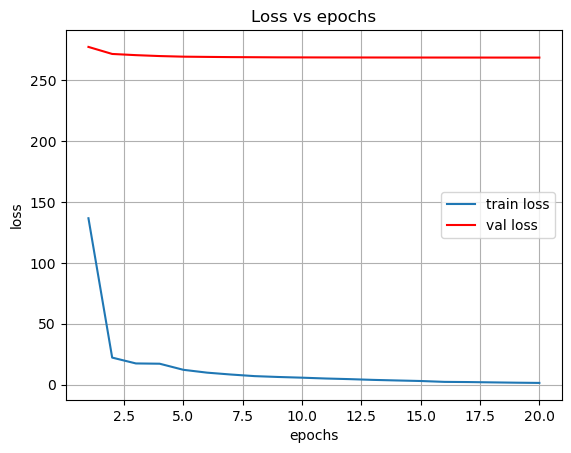

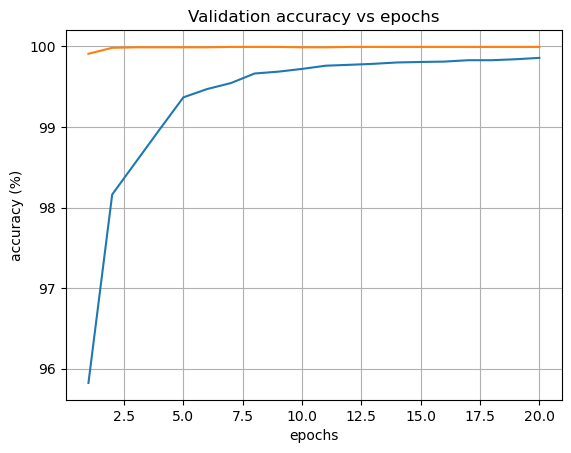

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = './runs/classify/train18/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'] ,label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100 , label='top1 accuracy')
plt.plot(results['                  epoch'], results['  metrics/accuracy_top5'] * 100 , label='top5 accuracy',)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')



plt.show()
